## Riley's Analysis Notebook
#### March 12th 2021
---

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("./../../data/raw/listings.csv")

In [3]:
dataset.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20201210194755,2020-12-11,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.95
1,5858,https://www.airbnb.com/rooms/5858,20201210194755,2020-12-11,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.79
2,7918,https://www.airbnb.com/rooms/7918,20201210194755,2020-12-11,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,9.0,9.0,8.0,NaN,f,8,0,8,0,0.14
3,8142,https://www.airbnb.com/rooms/8142,20201210194755,2020-12-11,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,10.0,9.0,9.0,NaN,f,8,0,8,0,0.10
4,8339,https://www.airbnb.com/rooms/8339,20201210194755,2020-12-10,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,10.0,10.0,10.0,STR-0000264,f,2,2,0,0,0.21


In [4]:
import seaborn as sns

In [34]:
features_1 = dataset[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price', 'property_type']]
features_1['price'] = features_1['price'].str.replace('$', '').str.replace(',', '').astype('float64')
features_1.dropna()

<ipython-input-34-4838a52b0c13>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  features_1['price'] = features_1['price'].str.replace('$', '').str.replace(',', '').astype('float64')
<ipython-input-34-4838a52b0c13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_1['price'] = features_1['price'].str.replace('$', '').str.replace(',', '').astype('float64')


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,property_type
0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,146.0,Entire apartment
1,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0,Entire apartment
2,84.0,7.0,8.0,9.0,9.0,9.0,8.0,56.0,Private room in apartment
3,93.0,9.0,9.0,10.0,10.0,9.0,9.0,56.0,Private room in apartment
4,97.0,10.0,10.0,10.0,10.0,10.0,10.0,768.0,Entire condominium
...,...,...,...,...,...,...,...,...,...
6958,100.0,10.0,10.0,10.0,10.0,10.0,10.0,489.0,Entire house
6961,100.0,10.0,10.0,10.0,10.0,10.0,10.0,139.0,Entire apartment
7029,75.0,8.0,9.0,9.0,9.0,10.0,8.0,84.0,Entire house
7031,100.0,10.0,10.0,10.0,10.0,10.0,10.0,75.0,Private room in house


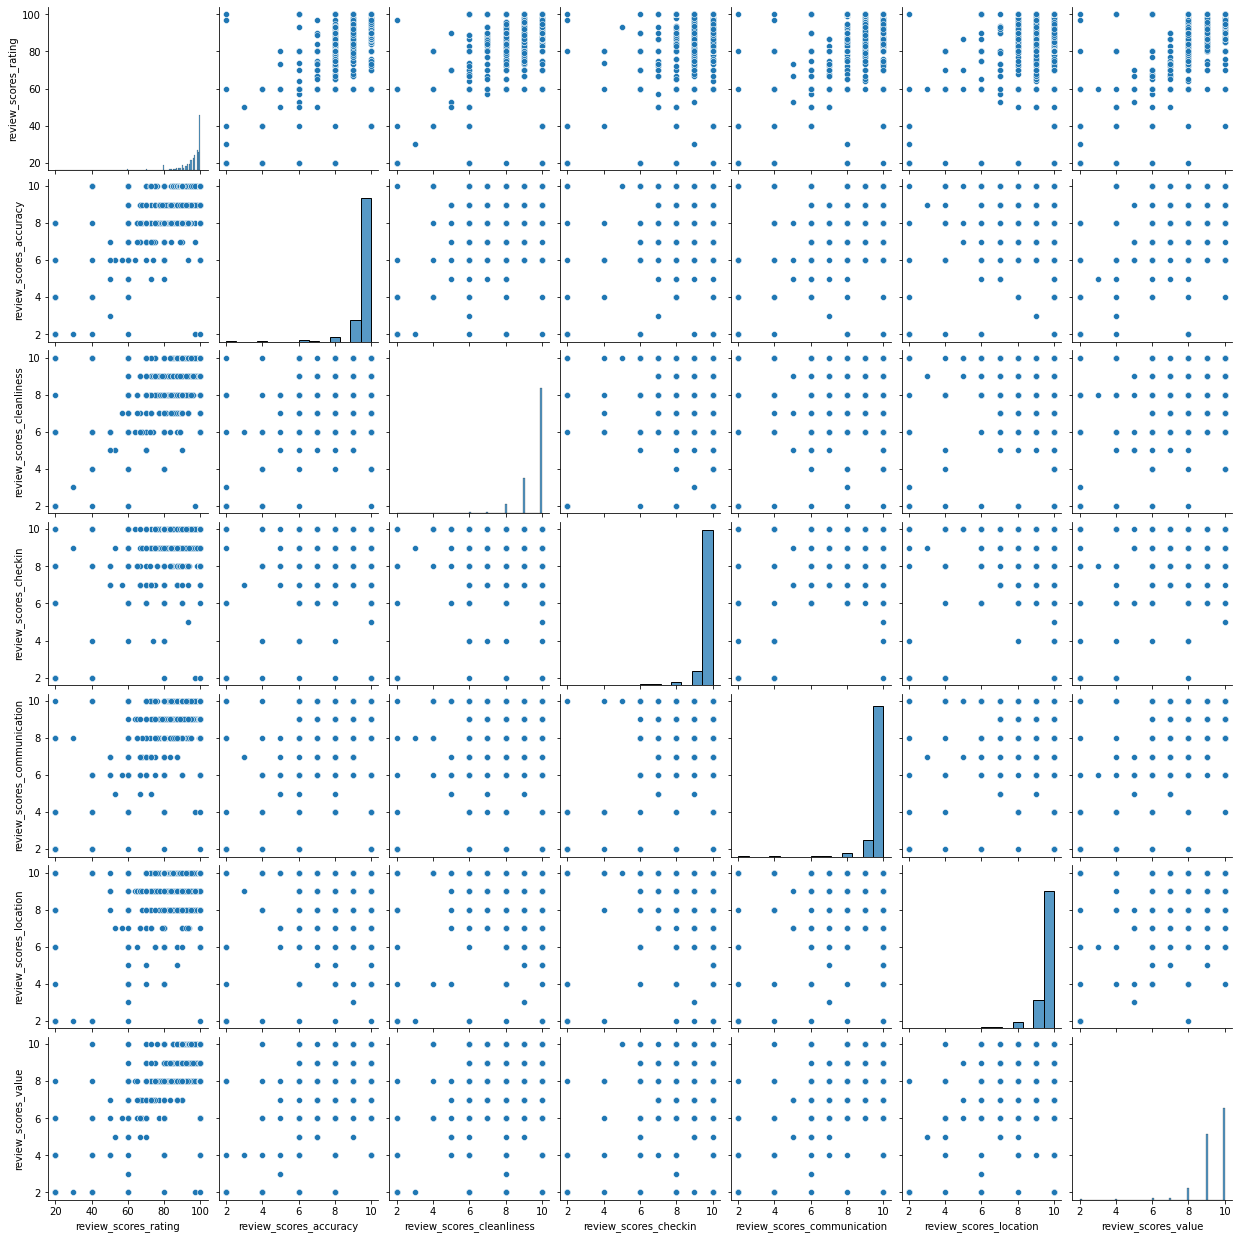

In [35]:
sns.pairplot(dataset[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']])

In [24]:
# I was looking for a relationship between price and rating, but the pairplot hasn't showed me much of interest. I might try taking the overall rating and comparing it to the price in more detail.

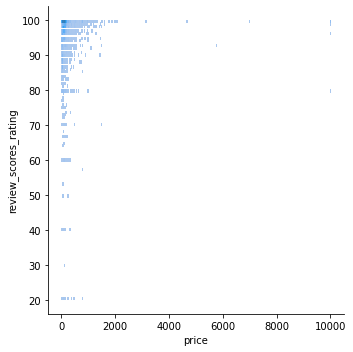

In [25]:
sns.displot(data=features_1, x="price", y="review_scores_rating")

In [26]:
# I would like to narrow down the data a bit more, so I will remove some outliers and plot the data again

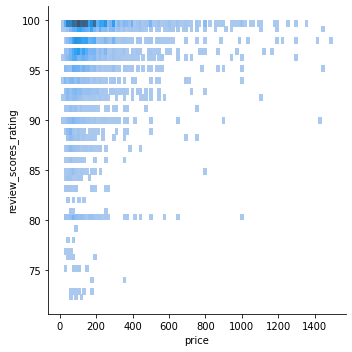

In [38]:
features_1_trimmed = features_1[(features_1['price'] < 1500) & (features_1['review_scores_rating'] > 70)]
sns.displot(data=features_1_trimmed, x="price", y="review_scores_rating")

In [30]:
# This is a bit better, but I would like to see if I can specify the property type to get a better relationship.
# I will see how the property types are distributed

<AxesSubplot:xlabel='property_type', ylabel='count'>

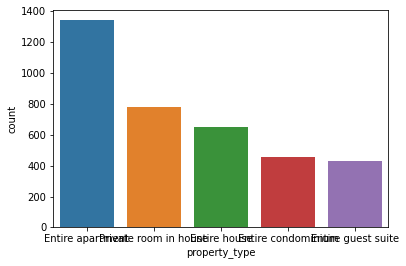

In [42]:
sns.countplot(x="property_type", data=features_1_trimmed, order=features_1_trimmed['property_type'].value_counts().iloc[:5].index)

In [43]:
# Now that I know the most popular types of properties, I will see if the relationship is different considering only single types of properties.

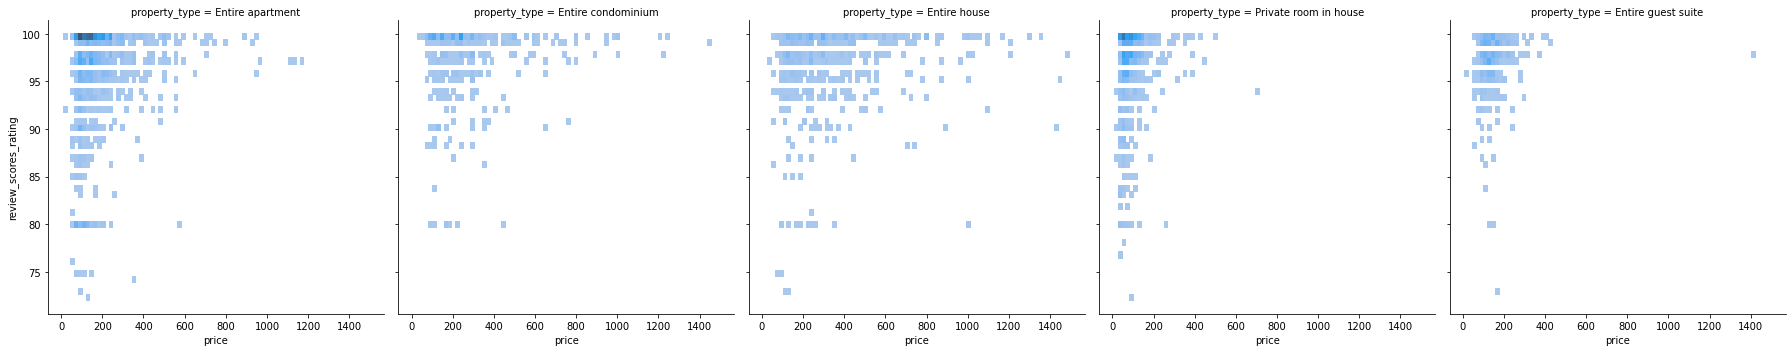

In [48]:
features_filtered = features_1_trimmed[features_1_trimmed['property_type'].isin(['Entire apartment', 'Private room in house', 'Entire house', 'Entire condominium', 'Entire guest suite'])]
sns.displot(data=features_filtered, x="price", y="review_scores_rating", col="property_type")

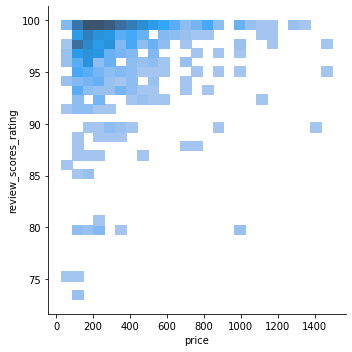

In [49]:
# The Entire house category looks fairly well distributed, so I will look more closely at that one
sns.displot(data=features_1_trimmed[features_1_trimmed['property_type'] == "Entire house"], x="price", y="review_scores_rating")

<ipython-input-55-f1d3799d4b24>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  features_2['price'] = features_2['price'].str.replace('$', '').str.replace(',', '').astype('float64')
<ipython-input-55-f1d3799d4b24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_2['price'] = features_2['price'].str.replace('$', '').str.replace(',', '').astype('float64')


<AxesSubplot:xlabel='host_is_superhost', ylabel='price'>

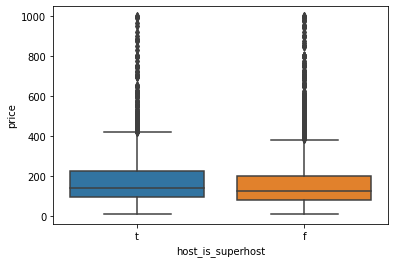

In [55]:
features_2 = dataset[['price', 'host_is_superhost']]
features_2['price'] = features_2['price'].str.replace('$', '').str.replace(',', '').astype('float64')
features_2 = features_2[features_2['price'] < 1000]
sns.boxplot(x="host_is_superhost", y="price", data=features_2)